# Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками

## Гистограмма выборки

В данном задании я рассматривал гамма распределение, с 2 числами k = 1, θ = 2 которые подобрал опираясь на данной картинке.
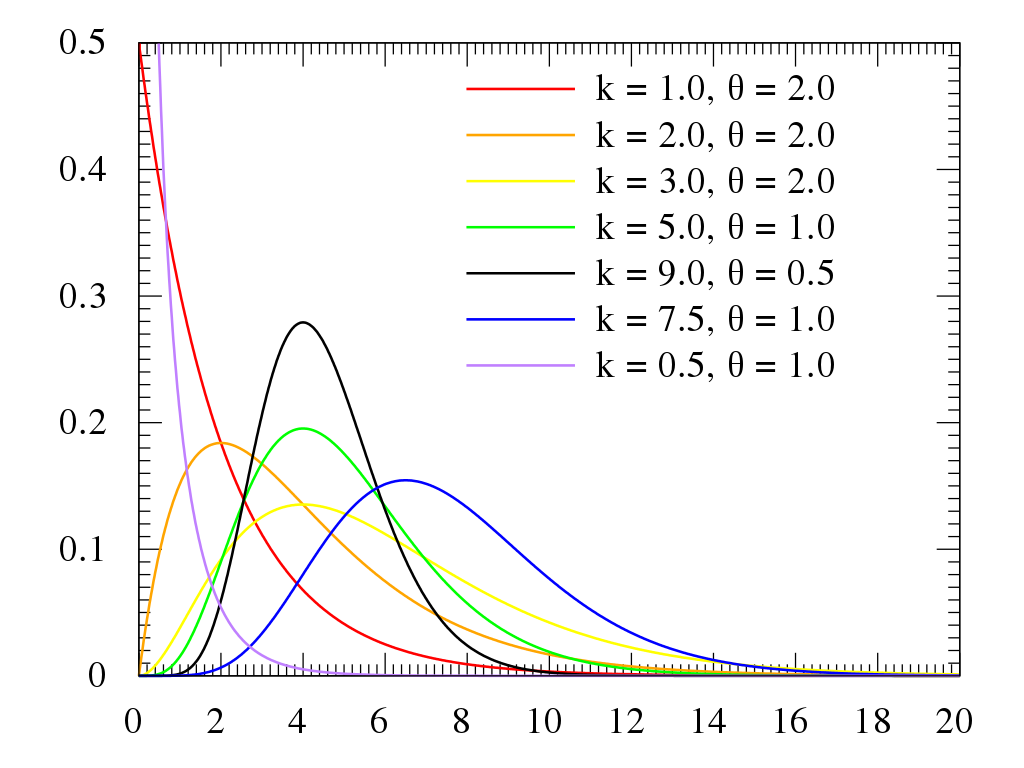

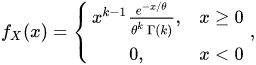
При k = 1 Гамма распределение сводится в Экспоненциальному распределению с параметром θ.

Сгенерируем из него выборку объёма 1000 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины.

In [1]:
# импортируем все необходимые библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

Text(0, 0.5, 'f(x)')

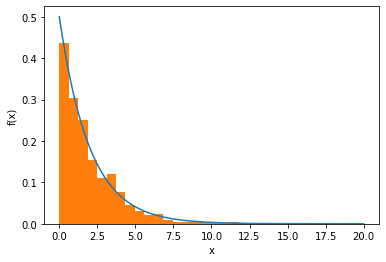

In [2]:
# сгенеруем выборку объема 1000 из распределения
x = np.linspace(0,20,1000)
#первое значение отвечает за параметр k, второй за начало отчет, третья за параметр тета
rv = sts.gamma(1.0, 0, 2.0) 
sample = rv.rvs(1000)

# расчитаем теоритеческую плотность вероятности (pdf - probability density function) для распределения
pdf = rv.pdf(x)

# построим гистограмму выборки и наложим на нее теоретическую 
# оценку плотности вероятности экспоненциального распределения
plt.plot(x, pdf)
plt.hist(sample, bins = 25, density = True)
plt.xlabel('x')
plt.ylabel('f(x)')

## Распределение выборочных средних

Перейдем к следующему шагу и оценим распределение выборочных средних случайной величины. Согласно Центральной Предельной Теореме выборочные средние $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

В моем случае экспоненциального распределения: $kθ = 2$ - математическое ожидание, $kθ^2 = 4$ - дисперсия.

In [3]:
# опишем функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних

def gen_pdf(n): 
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for _ in range(1000):
        sample = rv.rvs(n)
        # метод mean ищет среднее арифметическое данной фун
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # расчитаем теоритеческую плотность вероятности для нормального распределения
    mu = 2 # теоретическое ожидание
    sigma = (4./n) ** 0.5 # теоретическое сигма
    norm_rv = sts.norm(loc = mu, scale = sigma)
    x = np.linspace(0, 16, 1000)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf)
    plt.hist(means, density = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

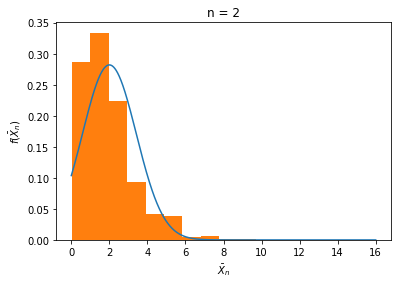

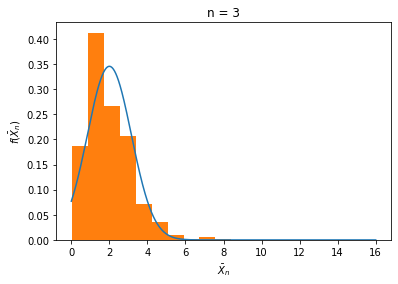

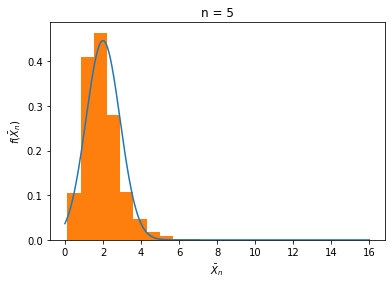

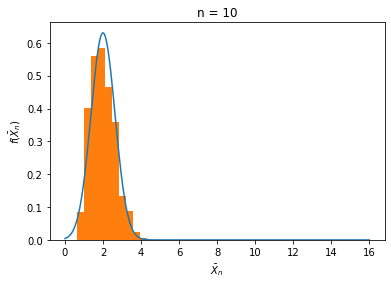

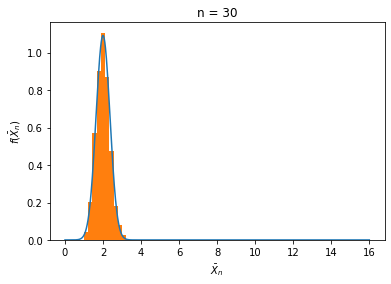

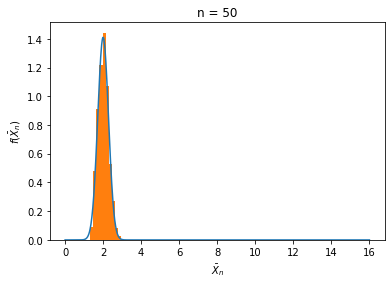

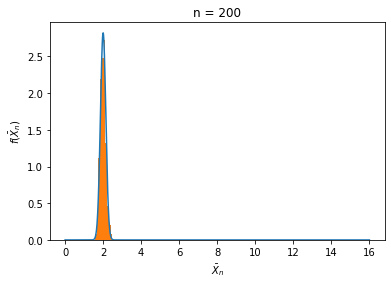

In [4]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок 
for n in [2, 3, 5, 10, 30, 50, 200]:
    gen_pdf(n)

Вывод: как видно из графиков, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению и еще ем больше объем выборки, тем более гладкой становится гистограмма. При n=2 распределение вообще несимметрично и совсем не похоже на нормальное, но примерно начиная с n = 10 распределение выборочных средних почти хорошо соответсвует нормальному.